In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
import pycountry
import os
from scipy.stats import linregress

In [2]:
# Setup for API
import hvplot.pandas
import requests
from pprint import pprint
from api_keys import geoapify_key

In [3]:
# Data File
hotel_data_path = "data/hotel_bookings.csv"

# Read Data File and store DataFrames
hotel_data = pd.read_csv(hotel_data_path)

hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
# Create a new DataFrame
new_hotel_data = hotel_data.copy()

# Rename columns for better understanding
rename_columns = {
    'hotel': 'Hotel',
    'is_canceled': 'Is canceled',
    'lead_time': 'Lead time',
    'arrival_date_year': 'Arrival date year',
    'arrival_date_month': 'Arrival date month',
    'arrival_date_week_number': 'Arrival date week number',
    'arrival_date_day_of_month': 'Arrival date day of month',
    'stays_in_weekend_nights': 'Stays in weekend nights',
    'stays_in_week_nights': 'Stays in week nights',
    'adults': 'Adults',
    'children': 'Children',
    'babies': 'Babies',
    'meal': 'Meal',
    'country': 'Country',
    'market_segment': 'Market segment',
    'distribution_channel': 'Distribution channel',
    'is_repeated_guest': 'Is repeated guest',
    'previous_cancellations': 'Previous cancellations',
    'previous_bookings_not_canceled': 'Previous bookings not canceled',
    'reserved_room_type': 'Reserved room type',
    'assigned_room_type': 'Assigned room type',
    'booking_changes': 'Booking changes',
    'deposit_type': 'Deposit type',
    'agent': 'Agent',
    'company': 'Company',
    'days_in_waiting_list': 'Days in waiting list',
    'customer_type': 'Customer type',
    'adr': 'ADR',
    'required_car_parking_spaces': 'Required car parking spaces',
    'total_of_special_requests': 'Total of special requests',
    'reservation_status': 'Reservation status',
    'reservation_status_date': 'Reservation status date'
}

# Rename DataFrame columns using dictionary
new_hotel_data.rename(columns=rename_columns, inplace=True)

new_hotel_data.columns

Index(['Hotel', 'Is canceled', 'Lead time', 'Arrival date year',
       'Arrival date month', 'Arrival date week number',
       'Arrival date day of month', 'Stays in weekend nights',
       'Stays in week nights', 'Adults', 'Children', 'Babies', 'Meal',
       'Country', 'Market segment', 'Distribution channel',
       'Is repeated guest', 'Previous cancellations',
       'Previous bookings not canceled', 'Reserved room type',
       'Assigned room type', 'Booking changes', 'Deposit type', 'Agent',
       'Company', 'Days in waiting list', 'Customer type', 'ADR',
       'Required car parking spaces', 'Total of special requests',
       'Reservation status', 'Reservation status date'],
      dtype='object')

In [6]:
new_hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Hotel                           119390 non-null  object 
 1   Is canceled                     119390 non-null  int64  
 2   Lead time                       119390 non-null  int64  
 3   Arrival date year               119390 non-null  int64  
 4   Arrival date month              119390 non-null  object 
 5   Arrival date week number        119390 non-null  int64  
 6   Arrival date day of month       119390 non-null  int64  
 7   Stays in weekend nights         119390 non-null  int64  
 8   Stays in week nights            119390 non-null  int64  
 9   Adults                          119390 non-null  int64  
 10  Children                        119386 non-null  float64
 11  Babies                          119390 non-null  int64  
 12  Meal            

In [7]:
# Removing the 'Company' column due to missing data
new_hotel_data.drop('Company',inplace=True,axis=1)

In [8]:
# View content by country, display the country column.
new_hotel_data['Country'].astype(str).unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'nan', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KNA', 

In [9]:
# Function to get country name
def get_country_name(alpha_3):
    if pd.isnull(alpha_3):
        return 'NULL'
    try:
        # Get the country name
        return pycountry.countries.get(alpha_3=alpha_3.upper()).name
    except (AttributeError, LookupError):
        return alpha_3

# Replace the 'country' column with country names
new_hotel_data['Country'] = new_hotel_data['Country'].apply(get_country_name)

In [10]:
# Display the values that were not replaced
no_match = new_hotel_data[new_hotel_data['Country'].isin(hotel_data['country'])]['Country'].unique()
print("Values not found in pycountry and not replaced:")
print(no_match)


Values not found in pycountry and not replaced:
['CN' 'TMP']


In [11]:
# Dictionary with unmatched country codes and their names
manual_country_replacements = {'CN': 'China', 'TMP': 'Timor-Leste'}

# Apply manual replacements
new_hotel_data['Country'] = new_hotel_data['Country'].replace(manual_country_replacements)

In [12]:
# Ordered list of countries
unique_countries = sorted(new_hotel_data['Country'].unique())
unique_countries

['Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bolivia, Plurinational State of',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Cayman Islands',
 'Central African Republic',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'French Southern Territories',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Guadeloupe',
 'Guatemala',
 'Guernsey',
 'Guinea-Bissau',
 'Guyana',
 'Honduras',
 'Hong Kong',
 'Hungary

In [13]:
# Replacement dictionary for the 'Market segment' column
market_segment_replacements = {
    'Offline TA/TO': 'Offline  Travel Agency / Tour Operators',
    'Online TA': 'Online Travel Agency',
}

# Replace acronyms with full names in the 'Market segment' column
new_hotel_data['Market segment'] = new_hotel_data['Market segment'].replace(market_segment_replacements)

In [14]:
# Check changes
new_hotel_data['Market segment'].unique()

array(['Direct', 'Corporate', 'Online Travel Agency',
       'Offline  Travel Agency / Tour Operators', 'Complementary',
       'Groups', 'Undefined', 'Aviation'], dtype=object)

In [15]:
# Replacement dictionary for the 'Distribution channel' column
distribution_channel_replacements = {'TA/TO': 'Travel Agency / Tour Operators', 'GDS': 'Global Distribution System'}

# Replace acronyms with full names in the 'Distribution channel' column
new_hotel_data['Distribution channel'] = new_hotel_data['Distribution channel'].replace(distribution_channel_replacements)

In [16]:
# Check changes
new_hotel_data['Distribution channel'].unique()

array(['Direct', 'Corporate', 'Travel Agency / Tour Operators',
       'Undefined', 'Global Distribution System'], dtype=object)

In [17]:
# Replacement dictionary for the 'Meal' column
meal_replacements = {
    'SC': 'Self-catering',
    'BB': 'Bed and breakfast',
    'HB': 'Half board',
    'FB': 'Full board'
}

# Replace acronyms with full names in the 'Meal' column
new_hotel_data['Meal'] = new_hotel_data['Meal'].replace(meal_replacements)

In [18]:
# Check changes
new_hotel_data['Meal'].unique()

array(['Bed and breakfast', 'Full board', 'Half board', 'Self-catering',
       'Undefined'], dtype=object)

In [19]:
# Remove duplicate rows to prevent skewing the analysis.
new_hotel_data.drop_duplicates(inplace=True)

In [20]:
# Check columns for null values
null_columns = new_hotel_data.columns[new_hotel_data.isnull().any()].tolist()
print("Columns with null values:")
print(null_columns)

Columns with null values:
['Children', 'Agent']


In [21]:
# Check the data in the 'Children' column
new_hotel_data['Children'].astype(str).unique()

array(['0.0', '1.0', '2.0', '10.0', '3.0', 'nan'], dtype=object)

In [22]:
# Check the data in the 'Agent' column
new_hotel_data['Agent'].astype(str).unique()

array(['nan', '304.0', '240.0', '303.0', '15.0', '241.0', '8.0', '250.0',
       '115.0', '5.0', '175.0', '134.0', '156.0', '243.0', '242.0', '3.0',
       '105.0', '40.0', '147.0', '306.0', '184.0', '96.0', '2.0', '127.0',
       '95.0', '146.0', '9.0', '177.0', '6.0', '143.0', '244.0', '149.0',
       '167.0', '300.0', '171.0', '305.0', '67.0', '196.0', '152.0',
       '142.0', '261.0', '104.0', '36.0', '26.0', '29.0', '258.0',
       '110.0', '71.0', '181.0', '88.0', '251.0', '275.0', '69.0',
       '248.0', '208.0', '256.0', '314.0', '126.0', '281.0', '273.0',
       '253.0', '185.0', '330.0', '334.0', '328.0', '326.0', '321.0',
       '324.0', '313.0', '38.0', '155.0', '68.0', '335.0', '308.0',
       '332.0', '94.0', '348.0', '310.0', '339.0', '375.0', '66.0',
       '327.0', '387.0', '298.0', '91.0', '245.0', '385.0', '257.0',
       '393.0', '168.0', '405.0', '249.0', '315.0', '75.0', '128.0',
       '307.0', '11.0', '436.0', '1.0', '201.0', '183.0', '223.0',
       '368.0', '3

In [23]:
# Replace 'nan' values in 'Children' and 'Agent' with 0
new_hotel_data = new_hotel_data.assign(
    Children=new_hotel_data['Children'].fillna(0),
    Agent=new_hotel_data['Agent'].fillna(0)
)

In [24]:
# Check columns for null values
null_columns = new_hotel_data.columns[new_hotel_data.isnull().any()].tolist()
print("Columns with null values:")
print(null_columns)

Columns with null values:
[]


In [25]:
# Convert columns to appropriate data types
new_hotel_data['Arrival date month'] = new_hotel_data['Arrival date month'].astype('category')
new_hotel_data['Children'] = new_hotel_data['Children'].astype('int64')
new_hotel_data['Agent'] = new_hotel_data['Agent'].fillna(0).astype('int64')
new_hotel_data['Reservation status date'] = pd.to_datetime(new_hotel_data['Reservation status date'])

In [26]:
new_hotel_data.dtypes

Hotel                                     object
Is canceled                                int64
Lead time                                  int64
Arrival date year                          int64
Arrival date month                      category
Arrival date week number                   int64
Arrival date day of month                  int64
Stays in weekend nights                    int64
Stays in week nights                       int64
Adults                                     int64
Children                                   int64
Babies                                     int64
Meal                                      object
Country                                   object
Market segment                            object
Distribution channel                      object
Is repeated guest                          int64
Previous cancellations                     int64
Previous bookings not canceled             int64
Reserved room type                        object
Assigned room type  

In [27]:
# Add a 'Stay duration' column that calculates the total length of stay
new_hotel_data['Stay duration'] = new_hotel_data['Stays in weekend nights'] + new_hotel_data['Stays in week nights']

In [28]:
# Add a 'Total guests' column that adds adults, children and babies
new_hotel_data['Total guests'] = new_hotel_data['Adults'] + new_hotel_data['Children'] + new_hotel_data['Babies']

In [29]:
# Create a new date column combining year, month and day
new_hotel_data['Arrival date'] = pd.to_datetime(new_hotel_data[[
    'Arrival date year', 'Arrival date month', 'Arrival date day of month']]
                                                .astype(str).agg('-'.join, axis=1), format='%Y-%B-%d')

In [30]:
# Create a new column to get the departure date
new_hotel_data['Departure date'] = new_hotel_data['Arrival date'] + pd.to_timedelta(
    new_hotel_data['Stay duration'], unit='d')

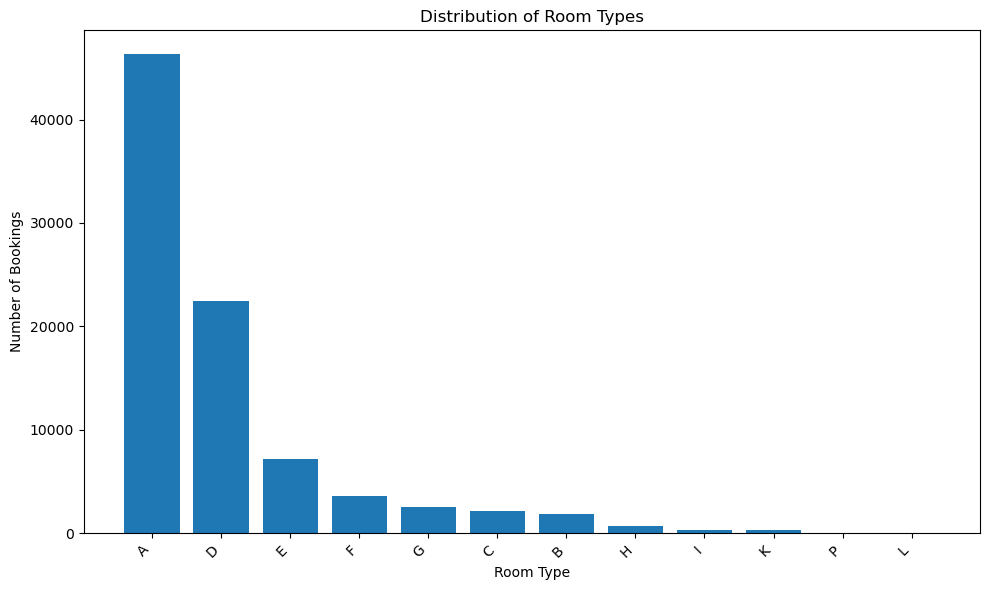

In [31]:
room_type_counts = new_hotel_data['Assigned room type'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(room_type_counts.index, room_type_counts.values)
plt.xlabel("Room Type")
plt.ylabel("Number of Bookings")
plt.title("Distribution of Room Types")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

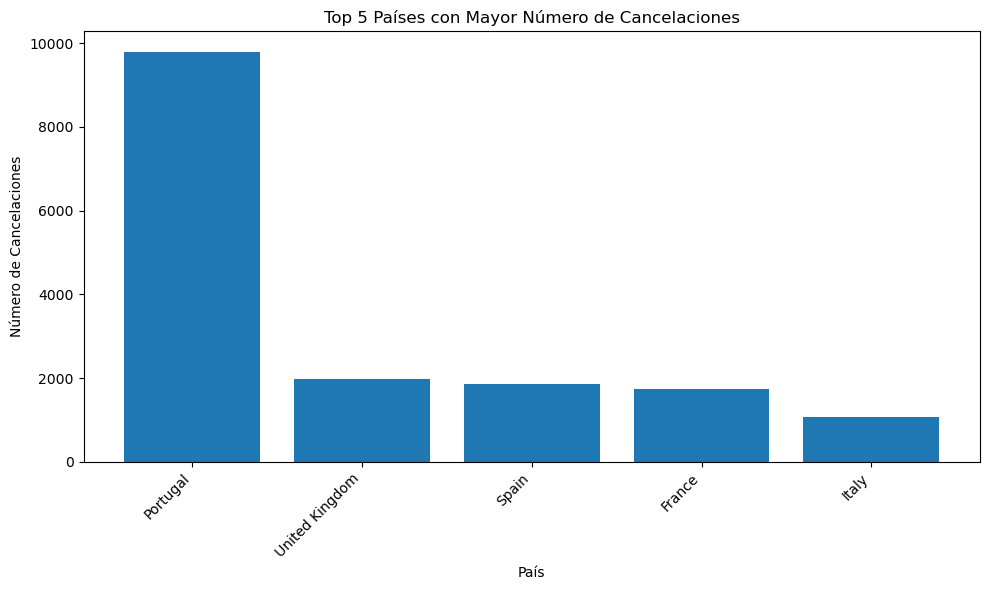

In [32]:
###CANCELACIONES POR PAIS
num_paises= len(new_hotel_data["Country"].value_counts())
paises = new_hotel_data["Country"].value_counts()

cantidades_cancelaciones = new_hotel_data["Is canceled"].value_counts()

lista_paises = [i for i in paises.index]
uno = pd.DataFrame({"Pais":[],
                    "cancelado":[],
                   "NO Cancelado": []})
for i in lista_paises:
    cancels = new_hotel_data["Is canceled"].loc[new_hotel_data["Country"] == f"{i}"].value_counts().values
    if len(cancels) == 2:
        if new_hotel_data["Is canceled"].loc[new_hotel_data["Country"] == "Spain"].value_counts().index[0] == 1:
            uno.loc[len(uno)] = [ i , cancels[0], cancels[1]]
        else:
            uno.loc[len(uno)] = [ i , cancels[1], cancels[0]]
        
    else:
        #if (dataf["is_canceled"].loc[dataf["country"] == f"ESP"].value_counts().index) == 0:
        if 0 in new_hotel_data["Is canceled"].loc[new_hotel_data["Country"] == "Spain"].value_counts().index:

            uno.loc[len(uno)] = [i, 0, cancels[0]]
        else:
            uno.loc[len(uno)] = [i, cancels[0], 0 ]
    
 
top5_cancelados = uno.sort_values(by='cancelado', ascending=False).head(5)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top5_cancelados['Pais'], top5_cancelados['cancelado'])
plt.xlabel("País")
plt.ylabel("Número de Cancelaciones")
plt.title("Top 5 Países con Mayor Número de Cancelaciones")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

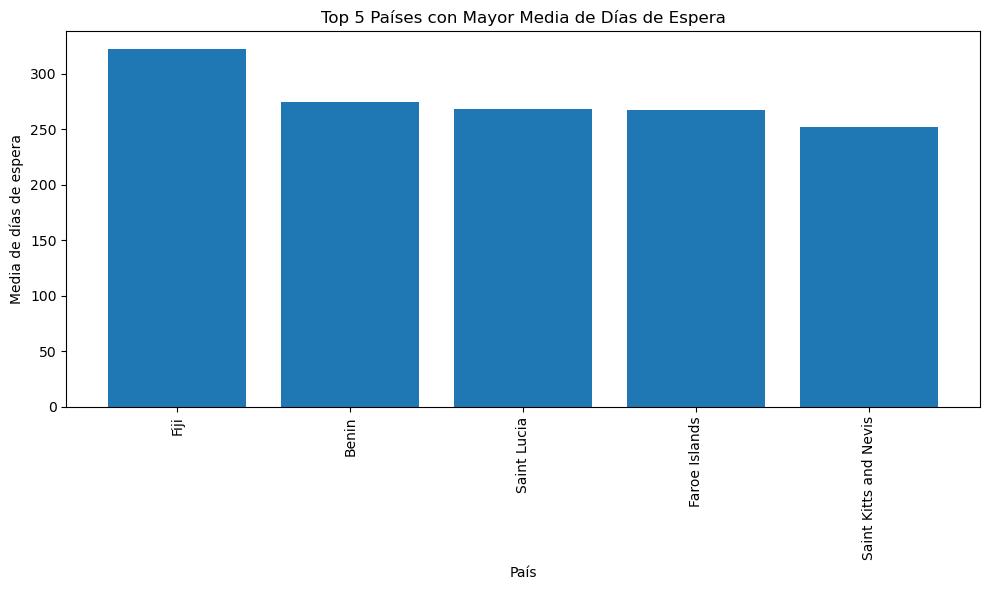

In [33]:
media_dias_espera_por_pais = new_hotel_data.groupby("Country")["Lead time"].mean()
media_dias_espera_por_pais = media_dias_espera_por_pais.sort_values(ascending=False)

top5_paises = media_dias_espera_por_pais.head(5)


plt.figure(figsize=(10, 6))
plt.bar(top5_paises.index, top5_paises.values)
plt.xlabel("País")
plt.ylabel("Media de días de espera")
plt.title("Top 5 Países con Mayor Media de Días de Espera")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

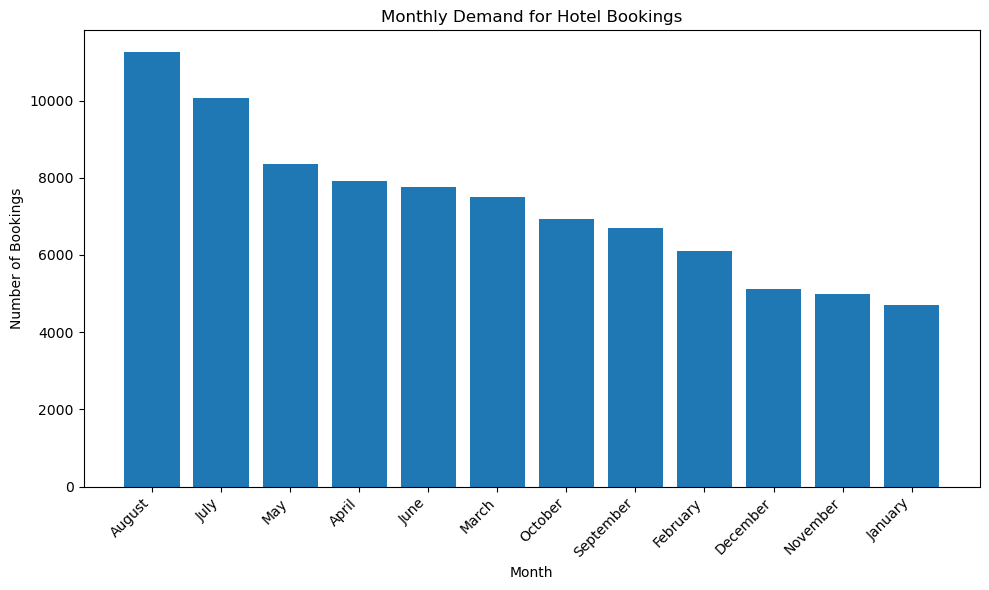

In [34]:
monthly_demand = new_hotel_data.groupby('Arrival date month', observed=True)['Hotel'].count()
# Sort months by demand in descending order
monthly_demand = monthly_demand.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_demand.index, monthly_demand.values)
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.title("Monthly Demand for Hotel Bookings")
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

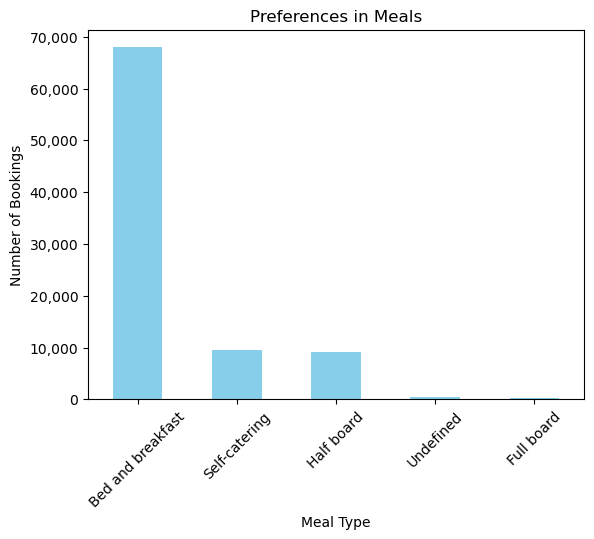

In [35]:
# Customer preference for accommodation and food options
meal_preferences = new_hotel_data['Meal'].value_counts()
meal_preferences.plot(kind='bar', color='skyblue')

plt.title('Preferences in Meals')
plt.xlabel('Meal Type')
plt.ylabel('Number of Bookings')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation=45)

# Save the figure
plt.savefig("output_data/Data_Customer_Fig_01.png")

plt.show()

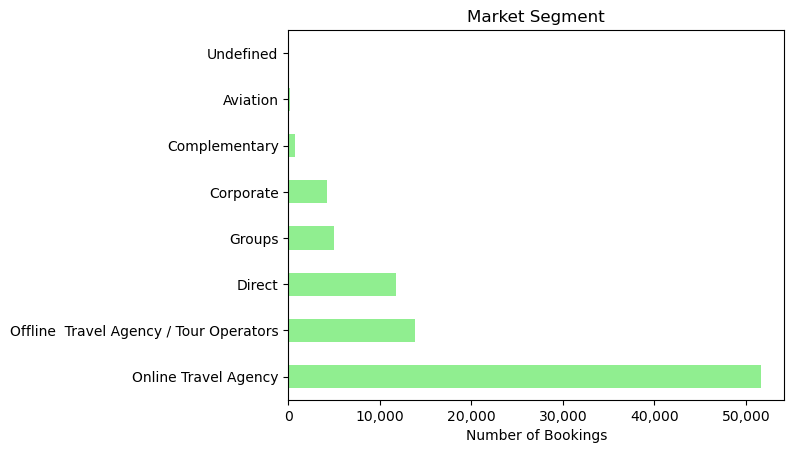

In [36]:
# Most common market segment among customers
market_segment_usage = new_hotel_data['Market segment'].value_counts()
market_segment_usage.plot(kind='barh', color='lightgreen')

plt.title('Market Segment')
plt.xlabel('Number of Bookings')
plt.ylabel('')

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Save the figure
plt.savefig("output_data/Data_Customer_Fig_02.png")

plt.show()

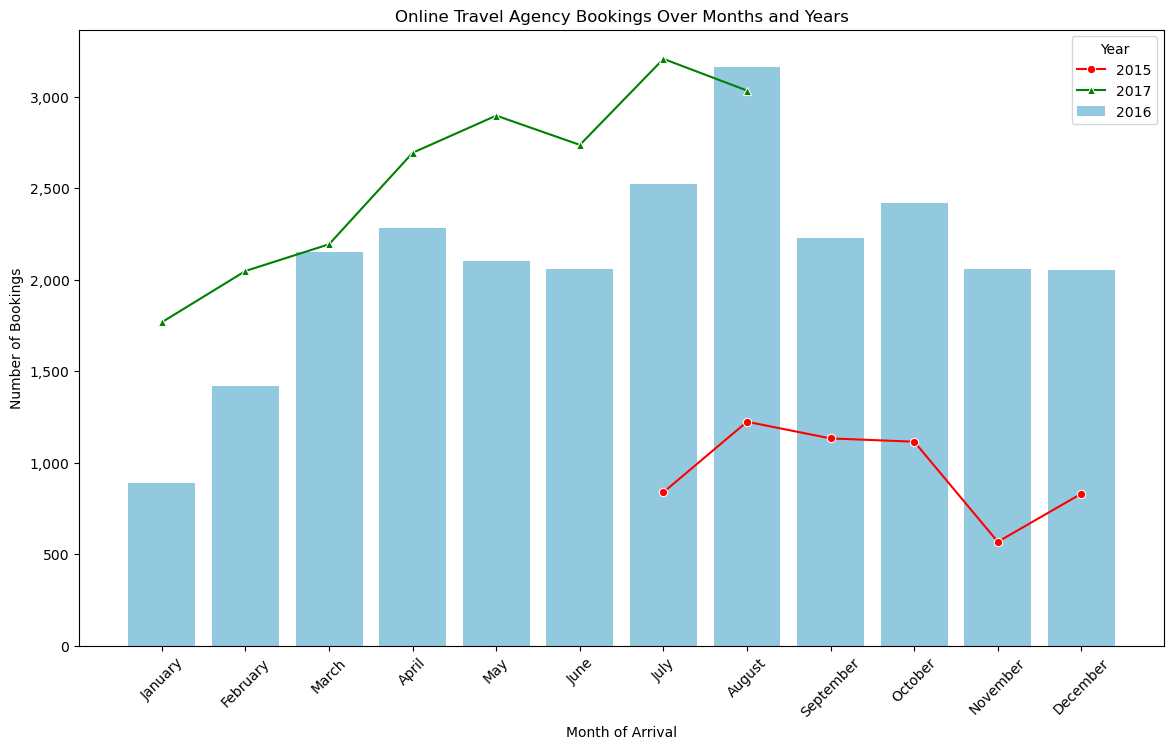

In [37]:
# Extract arrival date data
new_hotel_data['Arrival Year'] = new_hotel_data['Arrival date'].dt.year
new_hotel_data['Arrival Month'] = new_hotel_data['Arrival date'].dt.strftime('%B')

# Order the months
new_hotel_data['Arrival Month'] = pd.Categorical(new_hotel_data['Arrival Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)

# Filter the data "Online Travel Agency"
online_travel_agency_data = new_hotel_data[new_hotel_data['Market segment'] == 'Online Travel Agency']

# "Online Travel Agency" through the months
market_segment_monthly = online_travel_agency_data.groupby(['Arrival Year', 'Arrival Month'], observed=True).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
ax = plt.gca()

# Plot 2016
sns.barplot(data=market_segment_monthly[market_segment_monthly['Arrival Year'] == 2016], 
            x='Arrival Month', y='Count', color='skyblue', ax=ax, label='2016')

# Plot 2015
sns.lineplot(data=market_segment_monthly[market_segment_monthly['Arrival Year'] == 2015], 
             x='Arrival Month', y='Count', marker='o', color='red', ax=ax, label='2015')

# Plot 2017
sns.lineplot(data=market_segment_monthly[market_segment_monthly['Arrival Year'] == 2017], 
             x='Arrival Month', y='Count', marker='^', color='green', ax=ax, label='2017')

plt.title('Online Travel Agency Bookings Over Months and Years')
plt.xlabel('Month of Arrival')
plt.ylabel('Number of Bookings')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation=45)
plt.legend(title='Year')

# Save the figure
plt.savefig("output_data/Data_Customer_Fig_02.1.png")

plt.show()

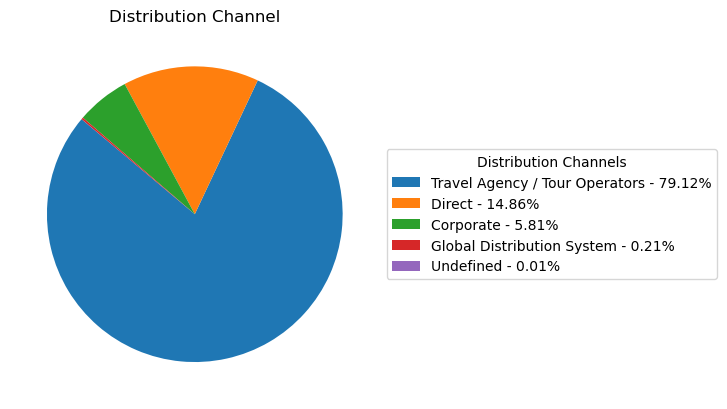

In [38]:
# Most used distribution channel by customers
distribution_channel_usage = new_hotel_data['Distribution channel'].value_counts()
percentages = 100 * distribution_channel_usage / distribution_channel_usage.sum()
labels = [f'{label} - {percentage:.2f}%' for label, percentage in zip(distribution_channel_usage.index, percentages)]
fig, ax = plt.subplots()
wedges, texts = ax.pie(distribution_channel_usage, startangle=140, textprops=dict(color="w"))

# Remove percentage labels
for text in texts:
    text.set_text('')

# Add legend with percentages
plt.legend(wedges, labels, title="Distribution Channels", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Distribution Channel')
plt.ylabel('')

# Save the figure
plt.savefig("output_data/Data_Customer_Fig_03.png", bbox_inches="tight")

plt.show()

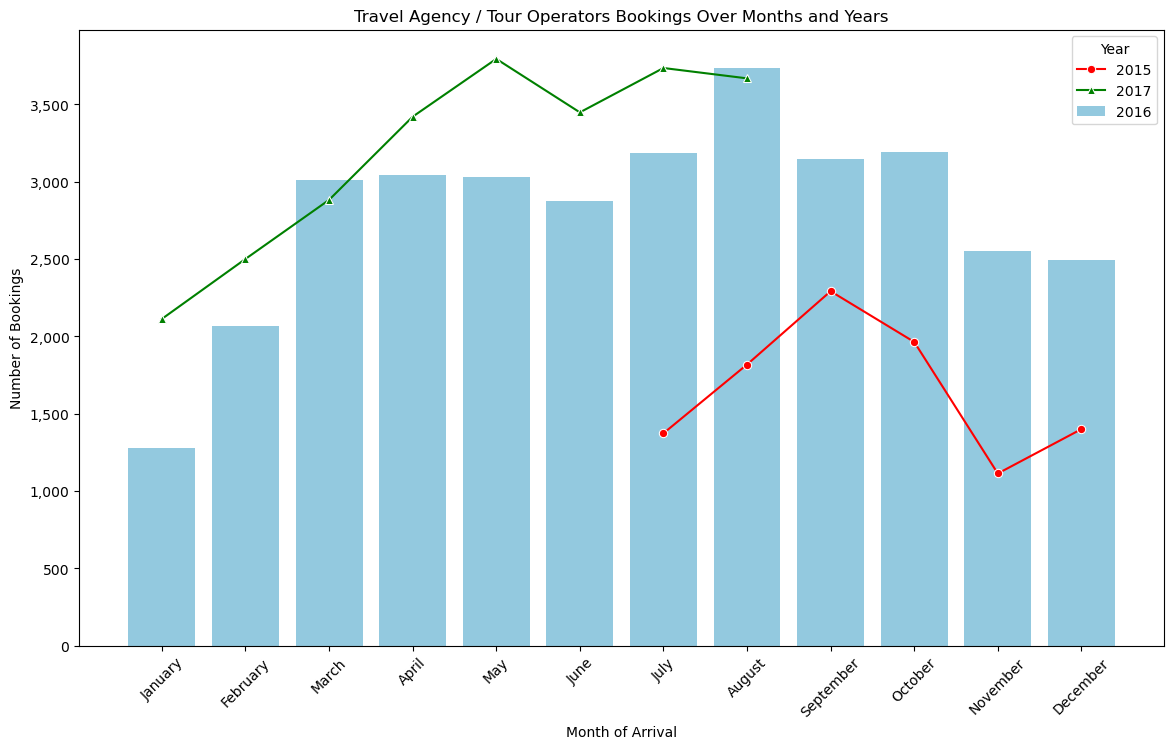

In [39]:
# Extract arrival date data
new_hotel_data['Arrival Year'] = new_hotel_data['Arrival date'].dt.year
new_hotel_data['Arrival Month'] = new_hotel_data['Arrival date'].dt.strftime('%B')

# Order the months
new_hotel_data['Arrival Month'] = pd.Categorical(new_hotel_data['Arrival Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)

# Filter the data "Travel Agency / Tour Operators"
ta_to_data = new_hotel_data[new_hotel_data['Distribution channel'] == 'Travel Agency / Tour Operators']

# "Travel Agency / Tour Operators" through the months
ta_to_monthly = ta_to_data.groupby(['Arrival Year', 'Arrival Month'], observed=True).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
ax = plt.gca()

# Plot 2016
sns.barplot(data=ta_to_monthly[ta_to_monthly['Arrival Year'] == 2016], 
            x='Arrival Month', y='Count', color='skyblue', ax=ax, label='2016')

# Plot 2015
sns.lineplot(data=ta_to_monthly[ta_to_monthly['Arrival Year'] == 2015], 
             x='Arrival Month', y='Count', marker='o', ax=ax, label='2015', color='red')

# Plot 2017
sns.lineplot(data=ta_to_monthly[ta_to_monthly['Arrival Year'] == 2017], 
             x='Arrival Month', y='Count', marker='^', ax=ax, label='2017', color='green')

plt.title('Travel Agency / Tour Operators Bookings Over Months and Years')
plt.xlabel('Month of Arrival')
plt.ylabel('Number of Bookings')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation=45)
plt.legend(title='Year')

# Save the figure
plt.savefig("output_data/Data_Customer_Fig_03.1.png")

plt.show()

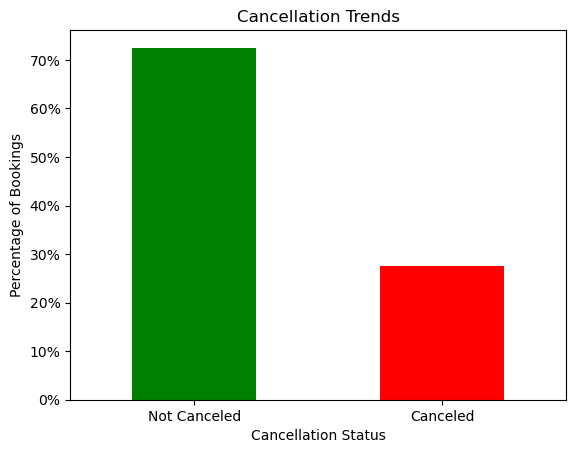

In [40]:
# Percentage of reservations that are cancelled
cancellation_trend = new_hotel_data['Is canceled'].value_counts(normalize=True) * 100
cancellation_trend.plot(kind='bar', color=['green', 'red'])

plt.title('Cancellation Trends')
plt.xlabel('Cancellation Status')
plt.ylabel('Percentage of Bookings')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks([0, 1], ['Not Canceled', 'Canceled'], rotation=0)

# Save the figure
plt.savefig("output_data/Data_Customer_Fig_04.png")

plt.show()

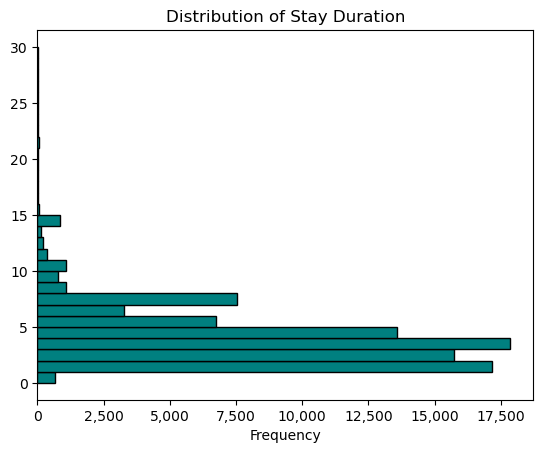

In [41]:
# Average length of stay of guests
stay_duration_distribution = new_hotel_data[new_hotel_data['Stay duration'] <= 30]['Stay duration']
stay_duration_distribution.plot(kind='hist', bins=30, color='teal', edgecolor='black', orientation='horizontal')

plt.title('Distribution of Stay Duration')
plt.xlabel('Frequency')
plt.ylabel('')

plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Save the figure
plt.savefig("output_data/Data_Customer_Fig_05.png")

plt.show()

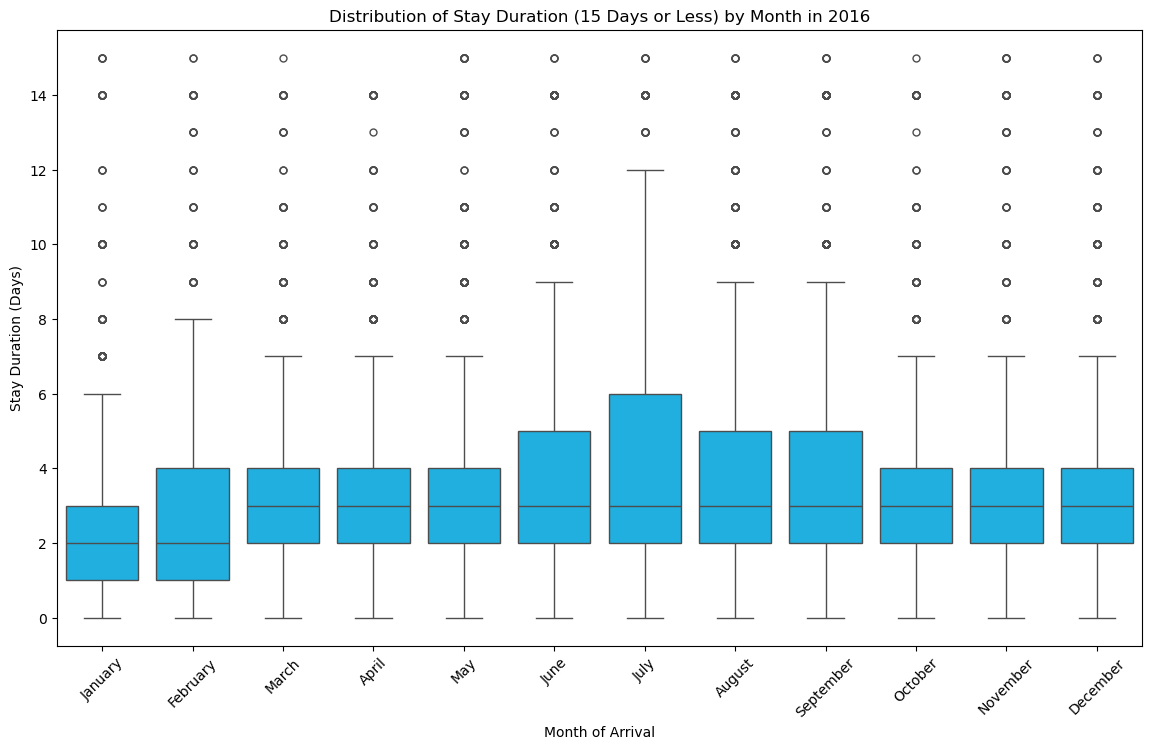

In [42]:
# Extract arrival date data
new_hotel_data['Arrival Year'] = new_hotel_data['Arrival date'].dt.year
new_hotel_data['Arrival Month'] = new_hotel_data['Arrival date'].dt.strftime('%B')

# Order the months
new_hotel_data['Arrival Month'] = pd.Categorical(new_hotel_data['Arrival Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)

# Filter the data the year 2016 and stays of 15 days or less
data_2016_short_stays = new_hotel_data[(new_hotel_data['Arrival Year'] == 2016) & (new_hotel_data['Stay duration'] <= 15)]

plt.figure(figsize=(14, 8))
ax = plt.gca()

# Create box plot
sns.boxplot(data=data_2016_short_stays, x='Arrival Month', y='Stay duration', ax=ax, color='deepskyblue', fliersize=5)

plt.title('Distribution of Stay Duration (15 Days or Less) by Month in 2016')
plt.xlabel('Month of Arrival')
plt.ylabel('Stay Duration (Days)')

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)

# Save the figure
plt.savefig("output_data/Data_Customer_Fig_05.1.png")

plt.show()


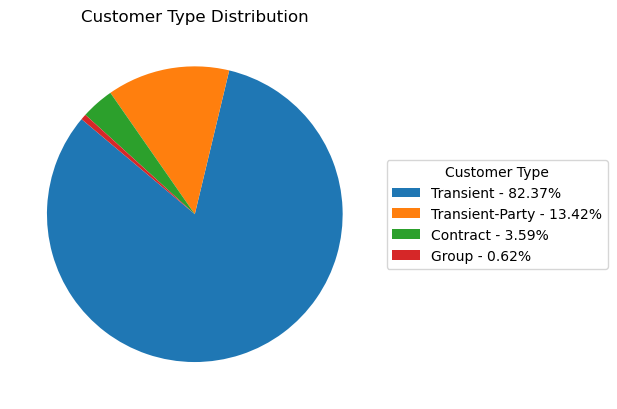

In [43]:
# Type of customers book more
customer_type_distribution = new_hotel_data['Customer type'].value_counts()
percentages = 100 * customer_type_distribution / customer_type_distribution.sum()
labels = [f'{label} - {percentage:.2f}%' for label, percentage in zip(customer_type_distribution.index, percentages)]
fig, ax = plt.subplots()
wedges, texts = ax.pie(customer_type_distribution, startangle=140, textprops=dict(color="w"))

# Remove percentage labels
for text in texts:
    text.set_text('')

# Add legend with percentages
plt.legend(wedges, labels, title="Customer Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title('Customer Type Distribution')
plt.ylabel('')

# Save the figure
plt.savefig("output_data/Data_Customer_Fig_06.png", bbox_inches="tight")

plt.show()

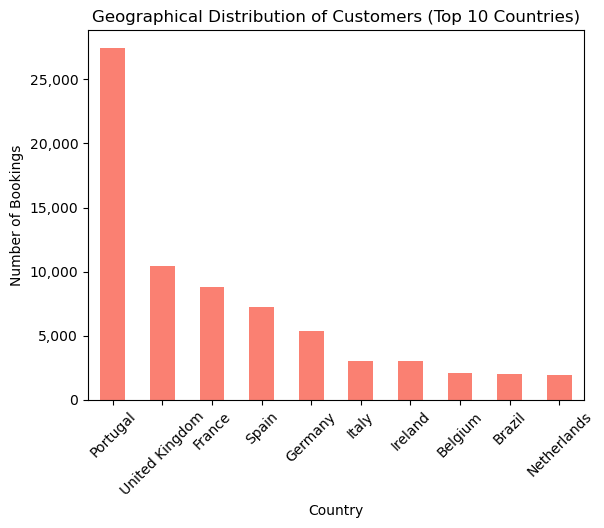

In [44]:
# Where customers come from
country_distribution = new_hotel_data['Country'].value_counts().head(10)
country_distribution.plot(kind='bar', color='salmon')

plt.title('Geographical Distribution of Customers (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.xticks(rotation=45)

# Save the figure
plt.savefig("output_data/Data_Customer_Fig_07.png")

plt.show()

In [45]:
# TEST
country_name = "Italy"
url = f"https://api.geoapify.com/v1/geocode/search?text={country_name}&apiKey={geoapify_key}"
response = requests.get(url).json()
pprint(response)


{'features': [{'bbox': [6.6272658, 35.2889616, 18.7844746, 47.0921462],
               'geometry': {'coordinates': [12.674297, 42.6384261],
                            'type': 'Point'},
               'properties': {'address_line1': 'Italy',
                              'address_line2': '',
                              'category': 'administrative',
                              'country': 'Italy',
                              'country_code': 'it',
                              'datasource': {'attribution': '© OpenStreetMap '
                                                            'contributors',
                                             'license': 'Open Database License',
                                             'sourcename': 'openstreetmap',
                                             'url': 'https://www.openstreetmap.org/copyright'},
                              'formatted': 'Italy',
                              'lat': 42.6384261,
                              'lon':

In [46]:
# Function to get coordinates from Geoapify with error
def get_coordinates(country_name, api_key):
    try:
        url = f"https://api.geoapify.com/v1/geocode/search?text={country_name}&apiKey={api_key}"
        response = requests.get(url).json()
        if response['features']:
            coords = response['features'][0]['geometry']['coordinates']
            return coords[1], coords[0]
    except Exception as e:
        print(f"Error looking coordinates for {country_name}: {e}")
    return None, None

country_distribution = new_hotel_data['Country'].value_counts().head(10)
country_counts = country_distribution.reset_index()
country_counts.columns = ['Country', 'Count']

# Add coordinates to the DataFrame
country_counts[['Latitude', 'Longitude']] = country_counts.apply(
    lambda x: pd.Series(get_coordinates(x['Country'], geoapify_key)), axis=1)

# Filter out rows with missing coordinates
country_counts = country_counts.dropna()

# Normalize the sizes for better visualization
min_size = 100
max_size = 750
country_counts['size_normalized'] = ((country_counts['Count'] - country_counts['Count'].min()) / 
                                    (country_counts['Count'].max() - country_counts['Count'].min()) * 
                                    (max_size - min_size) + min_size)

# Create an interactive map
map_plot = country_counts.hvplot.points(
    'Longitude', 'Latitude', geo=True, size='size_normalized', 
    color='Count', cmap='coolwarm', hover_cols=['Count', 'Country'], 
    tiles='OSM', title='Geographical Distribution of Customers (Top 10 Countries)', 
    alpha=0.6, width=800, height=600
)

map_plot


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Count,size_normalized,Country)

In [47]:
# Calculate the average days in waiting list per country
countries_df = pd.DataFrame(new_hotel_data.groupby("Country")["Days in waiting list"].mean())
DaysWaitingList = countries_df.loc[(countries_df["Days in waiting list"]) > 0.0]
DaysWaitingList


,Days in waiting list
Country,
Algeria,0.182927
Argentina,0.295567
Armenia,1.875000
Austria,2.174234
Belarus,2.625000
Belgium,0.119173
Brazil,0.204010
Bulgaria,0.926471
Chile,0.230769


In [48]:
# Calculate the length of stay for each row.
hotel_type_Stay_df = pd.DataFrame(new_hotel_data.groupby("Hotel")["Days in waiting list"].mean())

# 1. Convert the month into a number 
new_hotel_data["MonthNumber"] = pd.to_datetime(new_hotel_data["Arrival date month"], format='%B').dt.month

# 2. Create a column for arrival date mm/dd/yyyy
new_hotel_data["date_of_arrival"] = new_hotel_data[['MonthNumber', 'Arrival date day of month', 'Arrival date year']].astype(str).agg('/'.join, axis=1)

# 3. Calculate the length of stay 
new_hotel_data["length_of_stay"] = pd.to_datetime(new_hotel_data["Reservation status date"]) - pd.to_datetime(new_hotel_data["date_of_arrival"], format='%m/%d/%Y')

# 4. Filter by rooms that have Checkout status
hotel_df_checkouts = new_hotel_data[new_hotel_data["Reservation status"] == "Check-Out"]

# 5. Arrange data frame 
hotel_df_checkouts = hotel_df_checkouts[["Hotel", "date_of_arrival", "Reservation status date", "length_of_stay"]]
hotel_df_checkouts


,Hotel,date_of_arrival,Reservation status date,length_of_stay
0,Resort Hotel,7/1/2015,2015-07-01,0 days
1,Resort Hotel,7/1/2015,2015-07-01,0 days
2,Resort Hotel,7/1/2015,2015-07-02,1 days
3,Resort Hotel,7/1/2015,2015-07-02,1 days
4,Resort Hotel,7/1/2015,2015-07-03,2 days
...,...,...,...,...
119385,City Hotel,8/30/2017,2017-09-06,7 days
119386,City Hotel,8/31/2017,2017-09-07,7 days
119387,City Hotel,8/31/2017,2017-09-07,7 days
119388,City Hotel,8/31/2017,2017-09-07,7 days


In [49]:
# Convert the length_of_stay to a number of days and group by hotel type
hotel_df_checkouts.loc[:, "length_of_stay_number"] = hotel_df_checkouts["length_of_stay"].dt.days.astype(int)

# Calculate the average length of stay per hotel type
hotel_df_checkouts_2 = pd.DataFrame(hotel_df_checkouts.groupby("Hotel")["length_of_stay_number"].mean())

hotel_df_checkouts_2


,length_of_stay_number
Hotel,
City Hotel,2.991439
Resort Hotel,4.194982


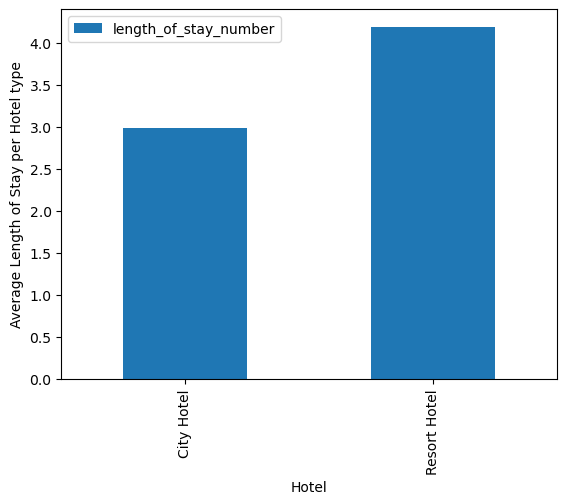

In [50]:
hotel_df_checkouts_2.plot.bar(y="length_of_stay_number")
plt.ylabel('Average Length of Stay per Hotel type')

plt.show()

In [51]:
months_demand=pd.DataFrame(hotel_data.groupby("arrival_date_month")["hotel"].count())

months_demand

,hotel
arrival_date_month,
April,11089
August,13877
December,6780
February,8068
January,5929
July,12661
June,10939
March,9794
May,11791


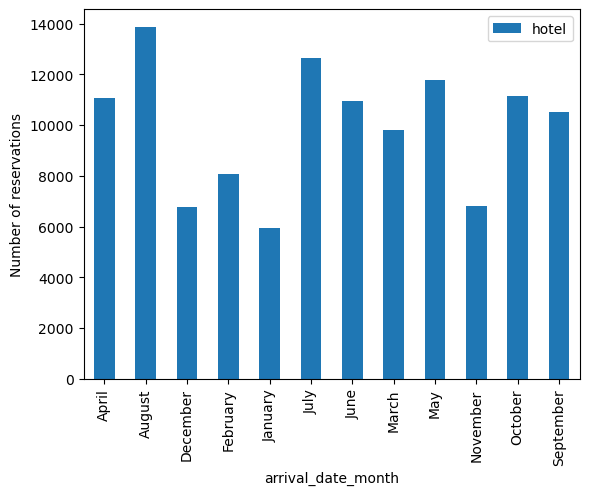

In [52]:
months_demand.plot.bar(y="hotel")
plt.ylabel('Number of reservations')

plt.show()

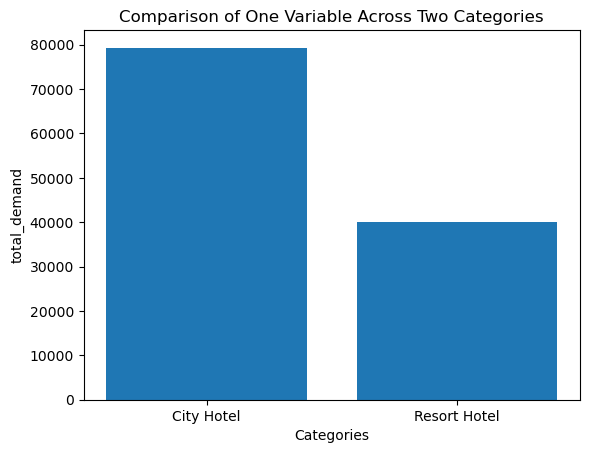

In [53]:
total_demand = hotel_data.groupby('hotel').count()  
categories = total_demand.index.tolist()  # This will give you the hotel categories
values = total_demand['arrival_date_month'].tolist()  # Replace 'demand' with the actual column name

plt.bar(categories,values)

plt.title('Comparison of One Variable Across Two Categories')
plt.xlabel('Categories')
plt.ylabel("total_demand")

plt.show()

C:\Users\Francisco\AppData\Local\Temp\ipykernel_18744\464775807.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values_city = [monthly_demand_city.get(month, 0) for month in months]
C:\Users\Francisco\AppData\Local\Temp\ipykernel_18744\464775807.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values_resort = [monthly_demand_resort.get(month, 0) for month in months]


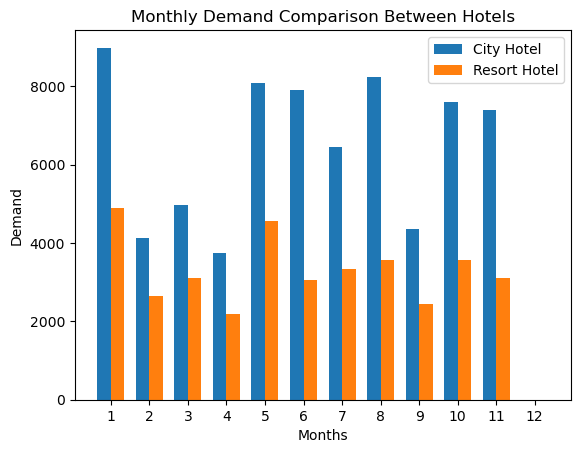

In [54]:
months = range(1, 13)  # Assuming you have 12 months
monthly_demand_city = hotel_data[hotel_data['hotel'] == 'City Hotel'].groupby('arrival_date_month').size()
monthly_demand_resort = hotel_data[hotel_data['hotel'] == 'Resort Hotel'].groupby('arrival_date_month').size()


values_city = [monthly_demand_city.get(month, 0) for month in months]
values_resort = [monthly_demand_resort.get(month, 0) for month in months]

x = np.arange(len(months))  
width = 0.35  

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, values_city, width, label='City Hotel')
bars2 = ax.bar(x + width/2, values_resort, width, label='Resort Hotel')

ax.set_xlabel('Months')
ax.set_ylabel('Demand')
ax.set_title('Monthly Demand Comparison Between Hotels')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

plt.show()

In [55]:

hotel_data_df=pd.DataFrame(new_hotel_data)

countries_df_hotel_type=pd.DataFrame(new_hotel_data.groupby("Hotel")["Days in waiting list"].mean())

DaysWaitingListHotelType=countries_df.loc[(countries_df["Days in waiting list"])>0.0]

DaysWaitingListHotelType

,Days in waiting list
Country,
Algeria,0.182927
Argentina,0.295567
Armenia,1.875000
Austria,2.174234
Belarus,2.625000
Belgium,0.119173
Brazil,0.204010
Bulgaria,0.926471
Chile,0.230769


In [56]:
k=pd.DataFrame(hotel_data.groupby("hotel")["hotel"].count())
k

,hotel
hotel,
City Hotel,79330
Resort Hotel,40060


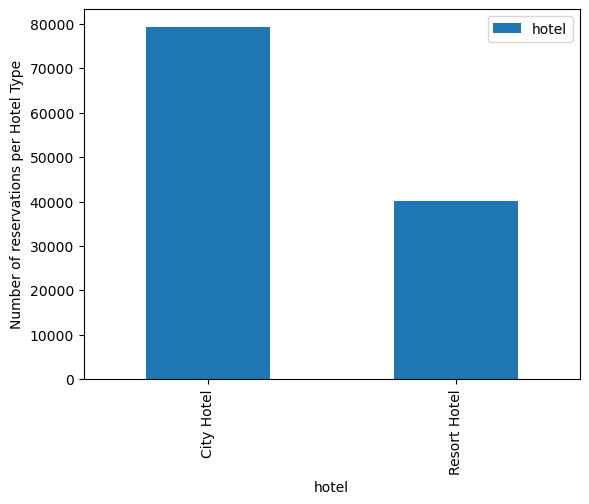

In [57]:
k.plot.bar(y="hotel")
plt.ylabel('Number of reservations per Hotel Type')

plt.show()

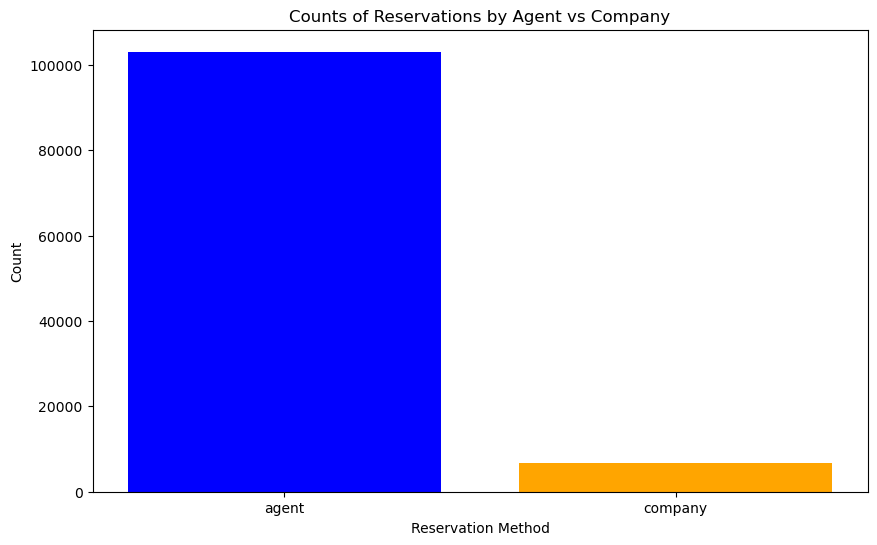

In [58]:
#Reservation Method
# Count the number of non-null values in each column
agent_count = hotel_data['agent'].notnull().sum()
company_count = hotel_data['company'].notnull().sum()

# Create a DataFrame with the counts for easier plotting
counts = pd.Series([agent_count, company_count], index=['agent', 'company'])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, color=['blue', 'orange'])
plt.xlabel("Reservation Method")
plt.ylabel("Count")
plt.title("Counts of Reservations by Agent vs Company")
plt.xticks(rotation=0)
plt.show()

In [59]:
## You can analyze the reservation method data by comparing the number of bookings made through Agents versus Companies. 
## If the agent count is higher, it could suggest that the hotel relies more on intermediaries to secure bookings. 
## On the other hand, if company bookings are higher, the hotel might be catering more to corporate clients or direct corporate partnerships.

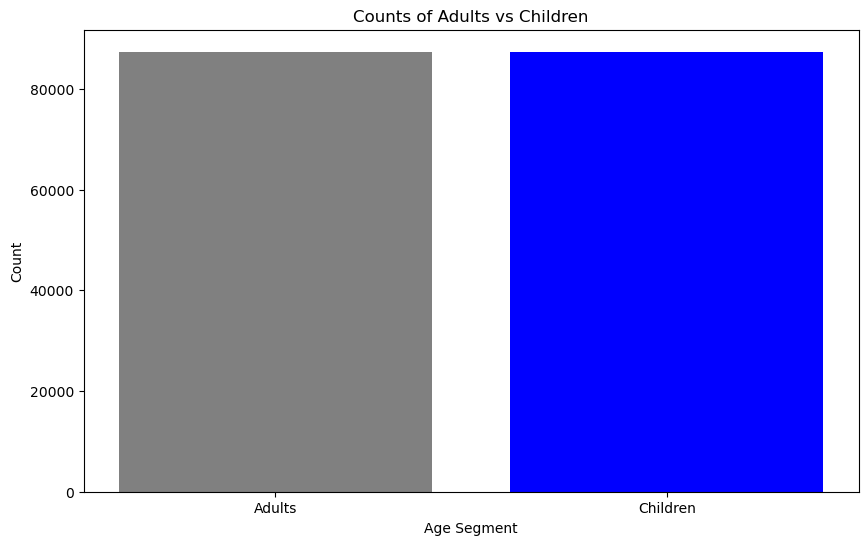

In [60]:
#Age Segments
# Count the number of non-null values in each column
adults_count = new_hotel_data['Adults'].notnull().sum()
children_count = new_hotel_data['Children'].notnull().sum()

# Create a DataFrame with the counts for easier plotting
counts = pd.Series([adults_count, children_count], index=['Adults', 'Children'])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, color=['grey', 'blue'])
plt.xlabel("Age Segment")
plt.ylabel("Count")
plt.title("Counts of Adults vs Children")
plt.xticks(rotation=0)
plt.show()

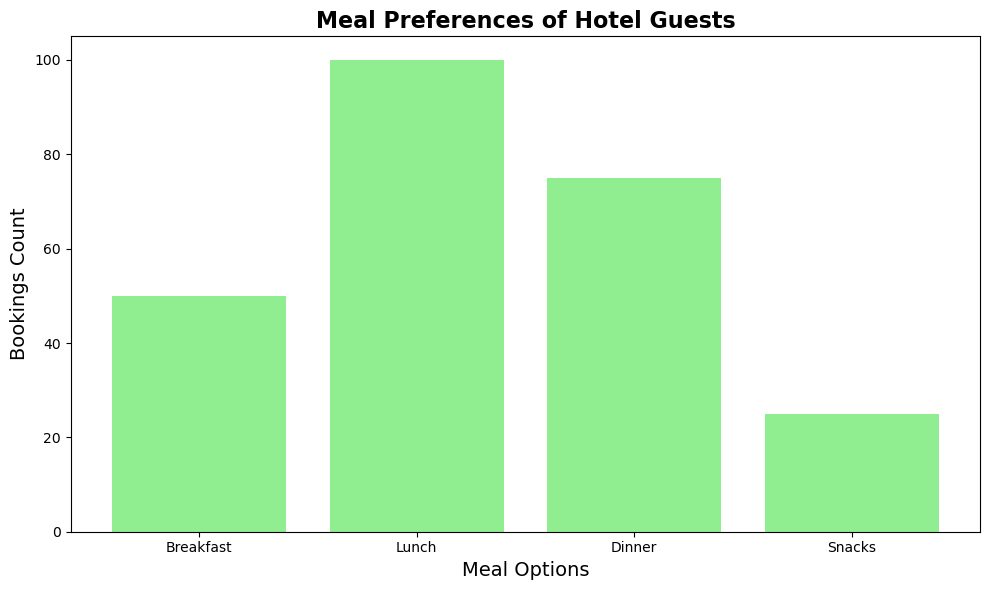

In [61]:
#Preferences in type of food
# Define the output directory and file path
output_dir = 'output_data' 
output_file = os.path.join(output_dir, 'Meal_Preferences_Bar_Chart.png')

# Check if the output directory exists, and create it if it doesn't
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Your plotting code here (example plot)
# This is where you add your actual plot code, below is an example bar plot
meal_counts = [50, 100, 75, 25]  # Sample data for illustration
meal_labels = ['Breakfast', 'Lunch', 'Dinner', 'Snacks']

plt.figure(figsize=(10, 6))
plt.bar(meal_labels, meal_counts, color='lightgreen')

# Add title and labels
plt.title('Meal Preferences of Hotel Guests', fontsize=16, fontweight='bold')
plt.xlabel('Meal Options', fontsize=14)
plt.ylabel('Bookings Count', fontsize=14)

# Save the plot as a PNG image
plt.tight_layout()
plt.savefig(output_file)

# Display the plot
plt.show()

In [62]:
## This chart gives insight into which meals are more popular with guests, which could 
## be useful for the hotel to adjust its meal offerings or better understand guest needs.

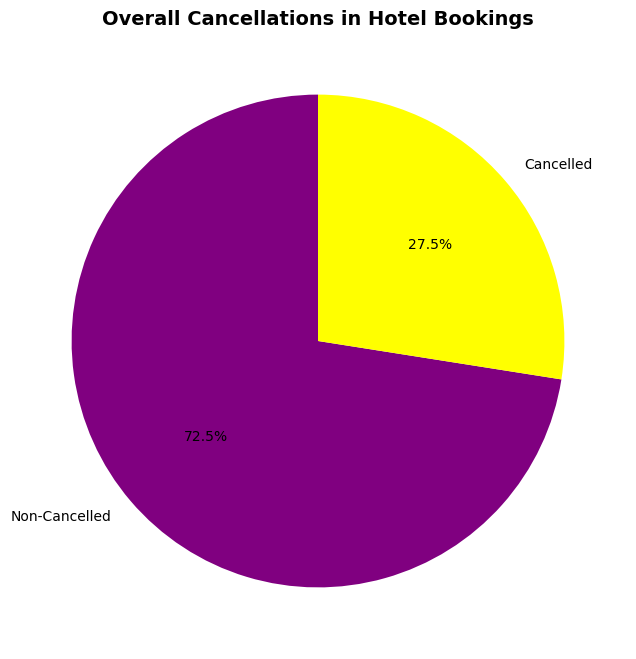

In [64]:
cancellation_counts = new_hotel_data['Is canceled'].value_counts()

# Define the labels for the pie chart (0: Non-cancelled, 1: Cancelled)
labels = ['Non-Cancelled', 'Cancelled']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(cancellation_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['purple', 'yellow'])
plt.title('Overall Cancellations in Hotel Bookings', fontsize=14, fontweight='bold')

# Display the pie chart
plt.show()

In [65]:
## The pie chart provides a quick, visual overview of the cancellation rate within the dataset, showing the relative sizes of 
## cancelled and non-cancelled bookings. This could inform operational decisions, 
## such as changes to cancellation policies or better customer retention strategies.

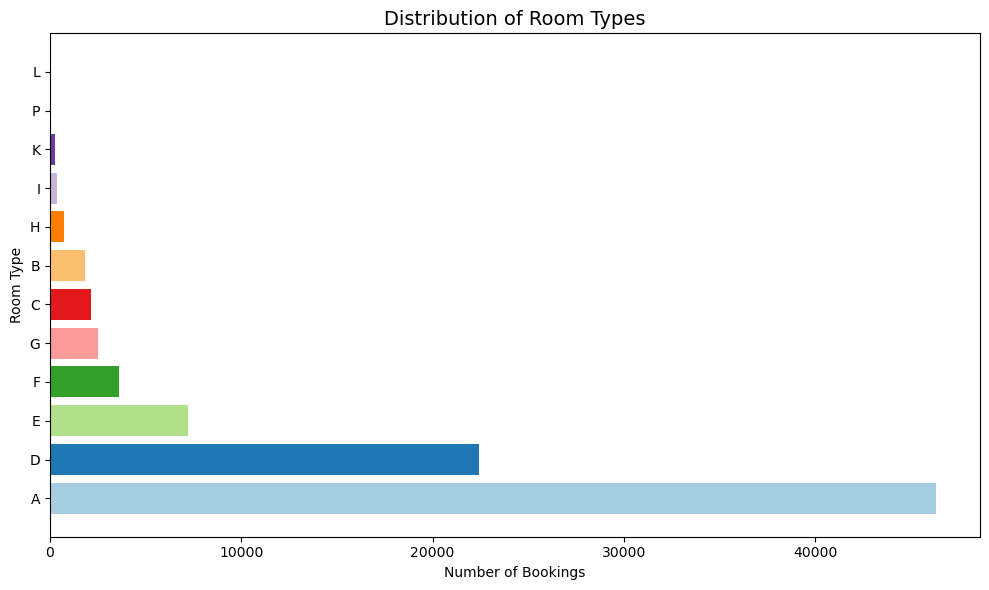

In [66]:
#Type fo Rooms
# Count the occurrences of each room type
room_type_counts = new_hotel_data['Assigned room type'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))

# Horizontal bar chart
plt.barh(room_type_counts.index, room_type_counts.values, color=plt.cm.Paired.colors[:len(room_type_counts)])

# Adding labels and title
plt.xlabel("Number of Bookings")
plt.ylabel("Room Type")
plt.title("Distribution of Room Types", fontsize=14)

# Display the chart
plt.tight_layout()
plt.show()

In [67]:
## This chart provides an overview of how different room types compare in terms of popularity, 
## and it allows the hotel to adjust its strategies to optimize room availability, marketing efforts, and pricing.

In [68]:
# Export the Data into a csv
## new_hotel_data.to_csv("output_data/new_hotel_data.csv", index_label="")

In [69]:
# Save the figure
## plt.savefig("output_data/Fig1.png")